<h1> Suicide Rate Visualization </h1>

<h3> Dataset Features </h3>
<ul>
<li> Country </li>
<li> Year </li>
<li> Age </li>
<li> suicides_no </li>
<li> Population </li>
<li> suicides/100k pop </li>
<li> country-year</li>
<li>HDI for year </li>
<li>gdp_for_year </li>
<li> gdp_per_capita</li>
<li> generation</li>
</ul>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("master.csv")

In [3]:
#shows first 5 rows
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
# shows last 5 rows
data.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [6]:
#Describe function includes analysis of all our numerical data. For this, count, mean, std, min,% 25,% 50,% 75, max values are given.
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [7]:
# info function shows the data types of our features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
#The headings of the feature values
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [9]:
#Rename the columns
data=data.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age','suicides_no':'SuicidesNo','population':'Population','suicides/100k pop':'Suicides100kPop','country-year':'CountryYear','HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney','gdp_per_capita ($)':'GdpPerCapitalMoney','generation':'Generation'})

In [10]:
# Rows and columns
data.shape

(27820, 12)

In [11]:
#check for null values
data.isnull().sum()

Country                   0
Year                      0
Gender                    0
Age                       0
SuicidesNo                0
Population                0
Suicides100kPop           0
CountryYear               0
HDIForYear            19456
GdpForYearMoney           0
GdpPerCapitalMoney        0
Generation                0
dtype: int64

In [13]:
data=data.drop(['HDIForYear'], axis = 1)

<h2> Now Lets Start Visualizing Our DataSet </h2>

In [14]:
#Now start analysis, min year and max year will find them
min_year=min(data.Year)
max_year=max(data.Year)
print('Min Year :',min_year)
print('Max Year :',max_year)


Min Year : 1985
Max Year : 2016


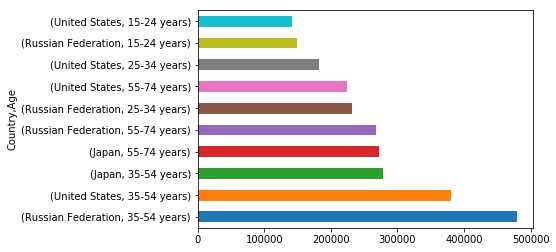

In [18]:
data.groupby(['Country','Age']).SuicidesNo.sum().nlargest(10).plot(kind='barh')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


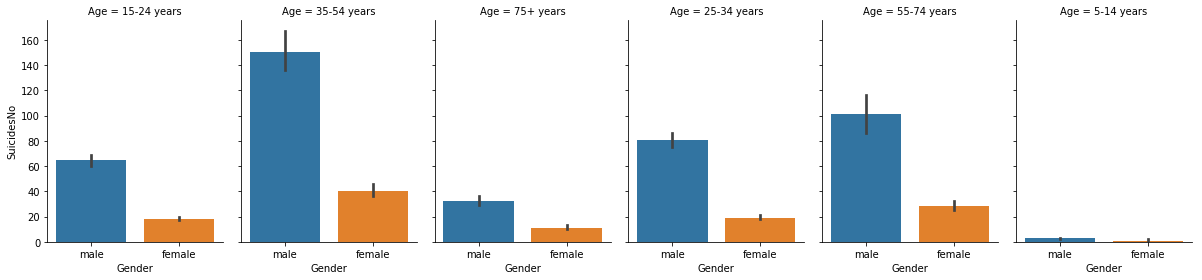

In [21]:
from numpy import median
ax = sns.catplot(x="Gender", y="SuicidesNo",col='Age', data=data, estimator=median,height=4, aspect=.7,kind='bar')

,Age,Gender,value
0,15-24 years,female,175437
1,25-34 years,female,208823
2,35-54 years,female,506233
3,5-14 years,female,16997
4,55-74 years,female,430036
5,75+ years,female,221984
6,15-24 years,male,633105
7,25-34 years,male,915089
8,35-54 years,male,1945908
9,5-14 years,male,35267


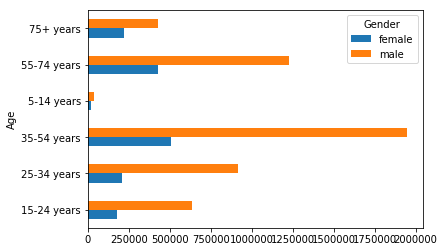

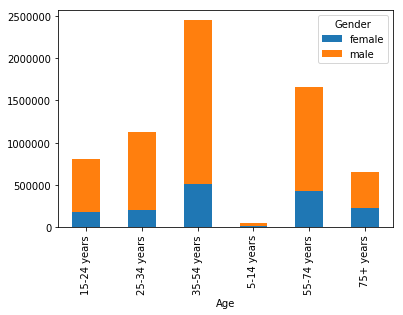

In [22]:
data.pivot_table(index='Age',columns='Gender',values='SuicidesNo', aggfunc='sum').plot(kind='barh')
data.groupby(by=['Age','Gender'])['SuicidesNo'].sum().unstack().plot(kind='bar',stacked=True)
data.groupby(by=['Age','Gender'])['SuicidesNo'].sum().unstack().reset_index().melt(id_vars='Age')

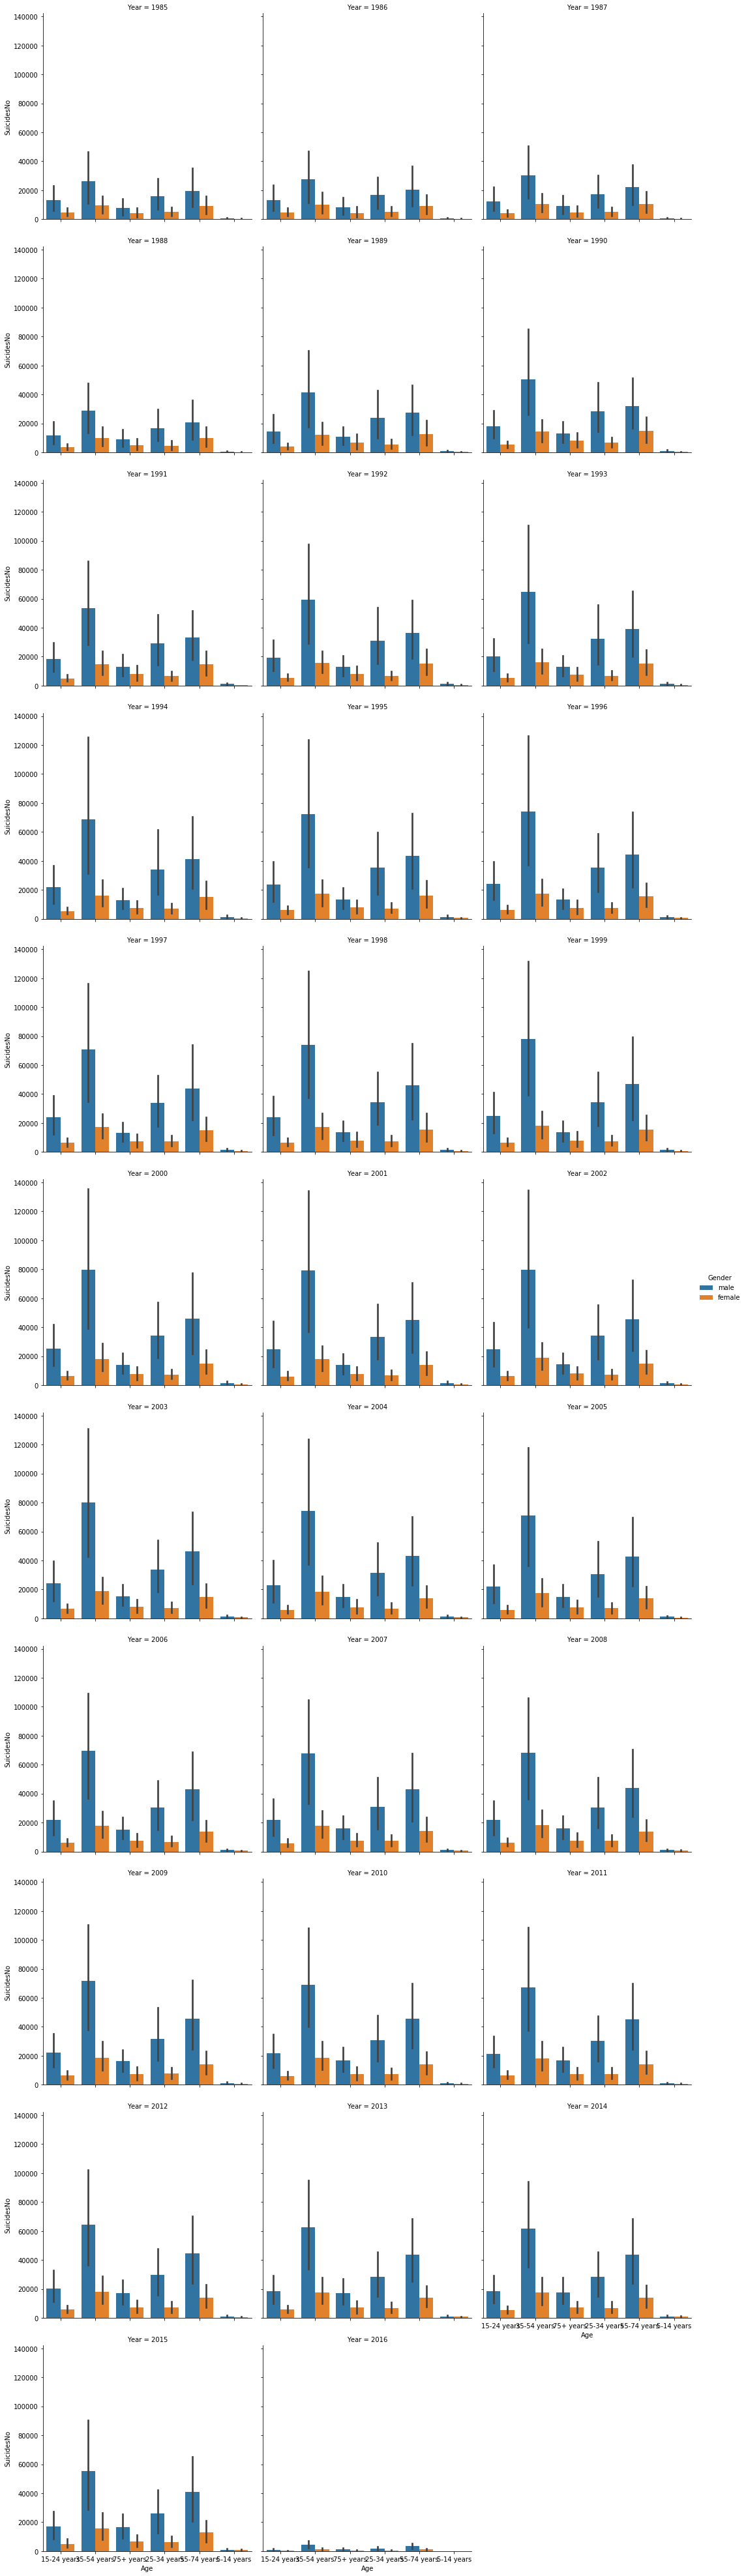

In [25]:
from numpy import sum
sns.catplot('Age','SuicidesNo',hue='Gender',col='Year',data=data,kind='bar',col_wrap=3,estimator=sum)

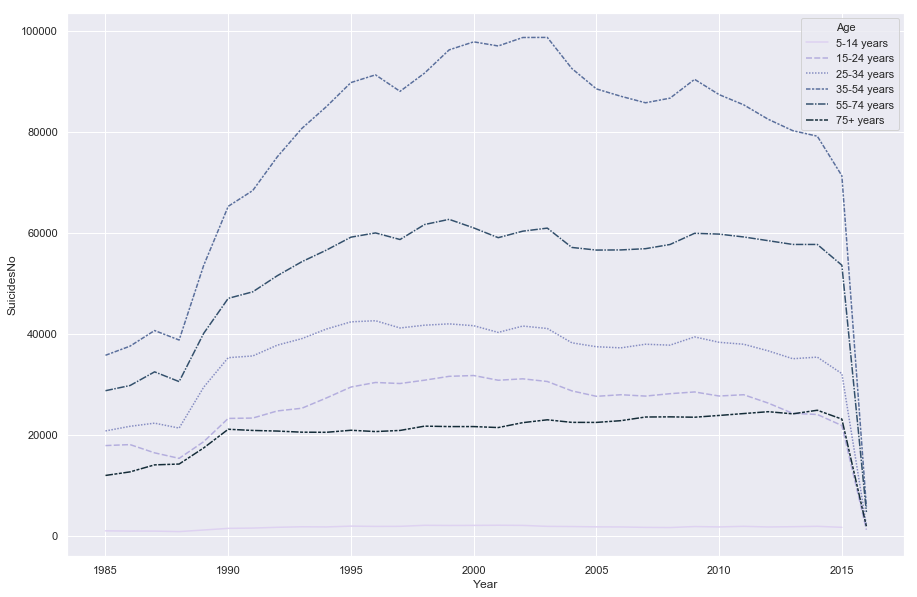

In [26]:
from matplotlib.colors import LogNorm
df = data.groupby(['Year','Age']).SuicidesNo.sum().reset_index()
df['Age'] = df.Age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot('Year','SuicidesNo',hue='Age',style='Age',data=df,hue_norm=LogNorm(),palette="ch:2.5,.25",sort=False)

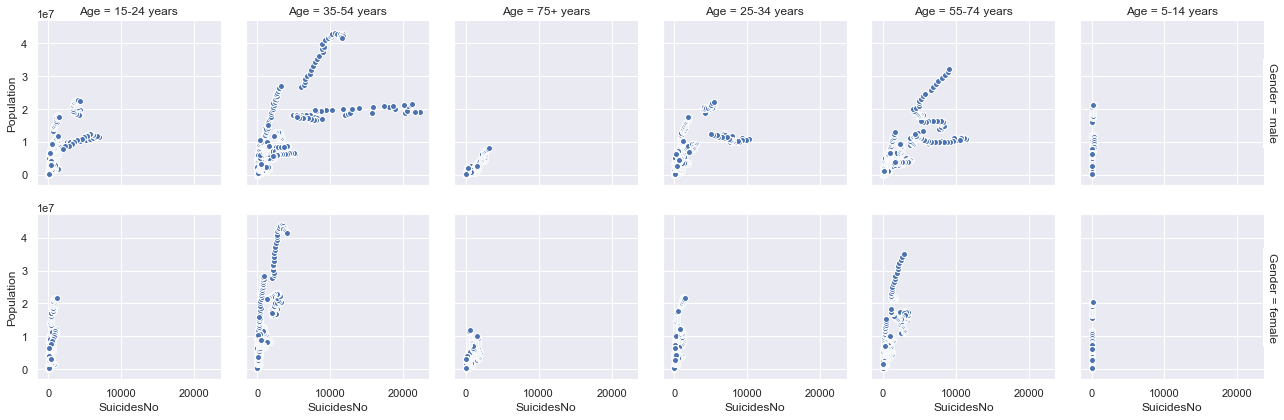

In [28]:

sns.set(style="darkgrid")
g = sns.FacetGrid(data, row="Gender", col="Age", margin_titles=True)
g.map(plt.scatter, "SuicidesNo","Population", edgecolor="w")

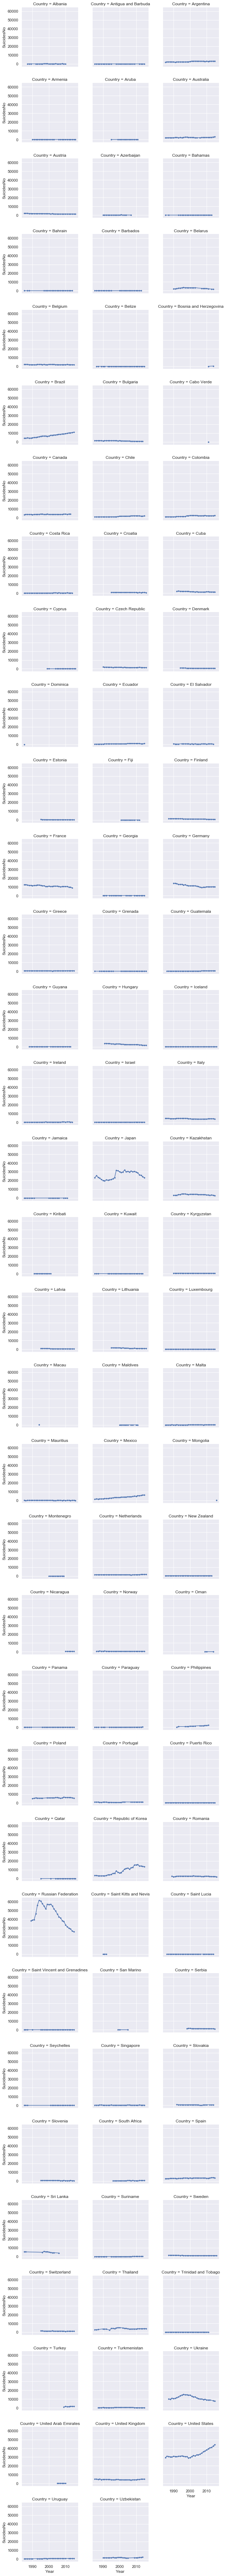

In [29]:
g = sns.FacetGrid(data.groupby(['Country','Year']).SuicidesNo.sum().reset_index(), col="Country", col_wrap=3)
g = g.map(plt.plot, "Year", "SuicidesNo", marker=".")

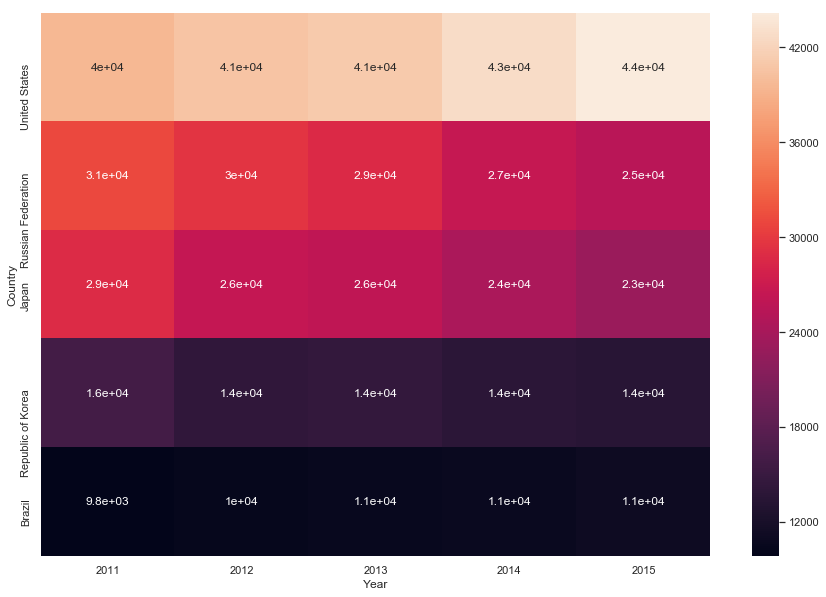

In [32]:
p = pd.crosstab(index=data.Country,columns=data.Year,values=data.SuicidesNo,aggfunc='sum')

sns.heatmap(p.loc[:,2011:2015].sort_values(2015, ascending=False).dropna().head(5),annot=True)

pp = pd.crosstab(index=data.Country,columns=data.Year,values=data.Population,aggfunc='sum')

pdivpp = p/pp*10000


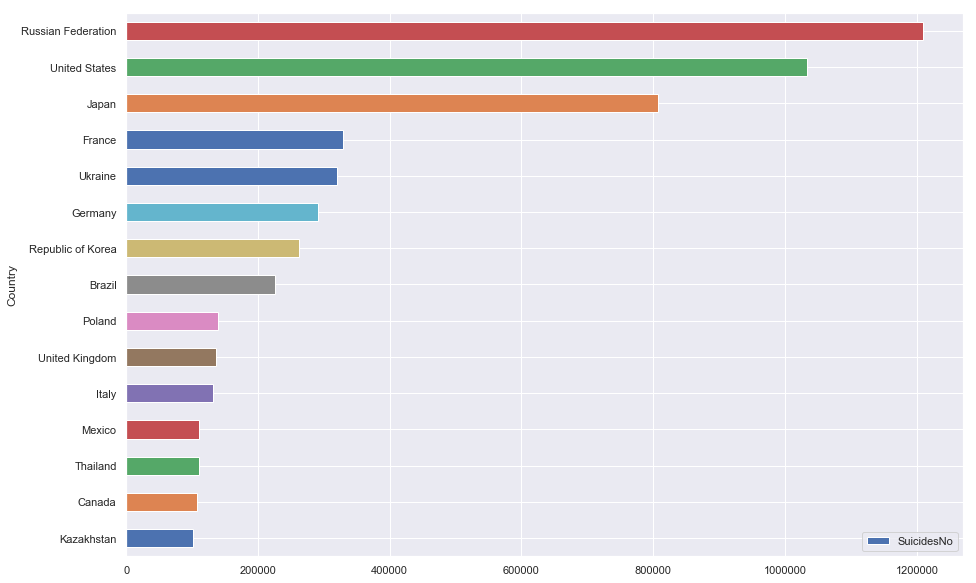

In [34]:
data.groupby(by=['Country'])['SuicidesNo'].sum().reset_index().sort_values(['SuicidesNo'],ascending=True).tail(15).plot(x='Country',y='SuicidesNo',kind='barh')